In [1]:
%pylab inline
import pandas as pd
from IPython.display import display, HTML


Populating the interactive namespace from numpy and matplotlib


In [2]:
sample=pd.read_csv("../input/sample_submission.csv")

In [3]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6202579 entries, 0 to 6202578
Data columns (total 2 columns):
id        int64
target    int64
dtypes: int64(2)
memory usage: 94.6 MB


In [5]:
sample['id'].max(),sample['id'].min()

(6202578, 0)

In [8]:
len(set(sample['id']))

6202579

In [9]:
del sample

In [2]:
%time test=pd.read_csv("../input/test.csv")

<string>:2: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 1min, sys: 5.18 s, total: 1min 5s
Wall time: 1min 5s


In [3]:
df=test

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6202579 entries, 0 to 6202578
Data columns (total 46 columns):
id             int64
customer_id    int64
market         object
date           int64
f_0            float64
f_1            float64
f_2            float64
f_3            float64
f_4            float64
f_5            float64
f_6            float64
f_7            float64
f_8            float64
f_9            float64
f_10           float64
f_11           float64
f_12           float64
f_13           float64
f_14           float64
f_15           float64
f_16           object
f_17           object
f_18           int64
f_19           object
f_20           float64
f_21           object
f_22           object
f_23           object
f_24           object
f_25           object
f_26           object
f_27           float64
f_28           int64
f_29           float64
f_30           float64
f_31           float64
f_32           float64
f_33           int64
f_34           float64
f_35        

In [22]:
df.shape

(6202579, 46)

In [23]:
df.head()

id   customer_id market     date  f_0       f_1       f_2       f_3  \
0   0  133900756857      e  5012017  1.0 -0.000018 -0.000014 -0.000016   
1   1  133900852745      c  5012017  1.0 -0.000018 -0.000016 -0.000018   
2   2  133900852745      o  5012017  1.0 -0.000018 -0.000006 -0.000011   
3   3  133900908086      o  5012017  1.0 -0.000018  0.000018  0.000016   
4   4  133900922919      a  5012017  0.0 -0.000018 -0.000018 -0.000018   

        f_4       f_5  ...       f_32  f_33      f_34      f_35      f_36  \
0 -0.000016 -0.000018  ...  -0.000018     2 -0.000018 -0.000018 -0.000018   
1 -0.000016 -0.000018  ...  -0.000015    11 -0.000018 -0.000018 -0.000018   
2 -0.000013 -0.000018  ...  -0.000009     5 -0.000018 -0.000018 -0.000018   
3 -0.000018 -0.000016  ...  -0.000017     2 -0.000018 -0.000018 -0.000017   
4 -0.000018 -0.000018  ...  -0.000013     5 -0.000018 -0.000018 -0.000018   

       f_37      f_38      f_39  f_40  f_41  
0 -0.000018 -0.000018 -0.000018     m   925  
1 -0.000012  0.000002 -0.000018     o   234  
2 -0.000018 -0.000010 -0.000018     o   234  
3 -0.000017 -0.000017 -0.000018     o   917  
4 -0.000018 -0.000016 -0.000018     o   774  

[5 rows x 46 columns]

In [47]:
df.isnull().mean()

id             0.000000
customer_id    0.000000
market         0.000000
date           0.000000
f_0            0.000000
f_1            0.000000
f_2            0.000000
f_3            0.000000
f_4            0.000000
f_5            0.000000
f_6            0.000000
f_7            0.000000
f_8            0.000000
f_9            0.000000
f_10           0.000000
f_11           0.000000
f_12           0.000000
f_13           0.000000
f_14           0.000000
f_15           0.000000
f_16           0.000000
f_17           0.000000
f_18           0.000000
f_19           0.000000
f_20           0.000000
f_21           0.000000
f_22           0.000000
f_23           0.000000
f_24           0.000000
f_25           0.000000
f_26           0.000000
f_27           0.000000
f_28           0.000000
f_29           0.000000
f_30           0.000000
f_31           0.000000
f_32           0.000000
f_33           0.000000
f_34           0.000000
f_35           0.000000
f_36           0.000000
f_37           0

In [24]:
df['customer_id'].value_counts().head()

135242618742    42
230105151845    40
227501066829    39
204100970694    38
221015946889    36
Name: customer_id, dtype: int64

In [25]:
df['customer_id'].value_counts().tail()

183303704750    1
204153751773    1
237918492991    1
218406603061    1
156000410836    1
Name: customer_id, dtype: int64

In [26]:
df['customer_id'].min(),df['customer_id'].max()

(133900756857, 258829999646)

In [27]:
df['market'].value_counts()

a    1215850
q     599628
e     340416
r     325274
f     282813
c     262492
s     255188
d     247051
k     244082
t     236913
x     232312
j     218711
w     209055
p     205595
b     196621
o     182897
m     159943
n     159735
l     156229
i     140384
v     109895
u      94340
h      64668
g      62487
Name: market, dtype: int64

In [28]:
df['date'].value_counts()

5012017    2099147
6012017    2075038
8012017    2028394
Name: date, dtype: int64

In [44]:
for col in df.columns:
    if col.startswith('f_'):
        if df[col].dtype=='int64':
            print col, df[col].value_counts().shape
            display(pd.DataFrame(df[col].value_counts()))
            

f_18 (3,)


f_18
0  5034034
1   880297
2   288248

f_28 (21,)


f_28
20  1102757
19   978625
18   830115
16   807094
17   637960
14   527201
15   509553
12   281577
13   252446
11   115850
9     57691
10    57223
8     28724
7     11606
6      2121
5       768
4       504
3       329
2       250
1       108
0        77

f_33 (10,)


f_33
5   1714372
2   1403133
11   949974
7    817063
4    588202
6    393103
9    177573
13    97488
12    54295
3      7376

In [74]:
df['f_0'].value_counts().head()

1.000000    5748606
0.000000     108466
0.500000      56458
0.666667      33161
0.750000      22571
Name: f_0, dtype: int64

f_0 (2290,)


f_0
count  6.202579e+06
mean   9.699223e-01
std    1.464213e-01
min    0.000000e+00
25%    1.000000e+00
50%    1.000000e+00
75%    1.000000e+00
max    1.000000e+00

f_0
1.000000  5748606
0.000000   108466
0.500000    56458
0.666667    33161
0.750000    22571

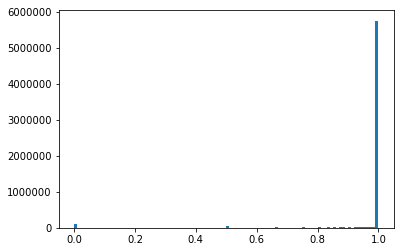

f_1 (13222,)


f_1
count  6.202579e+06
mean  -1.777175e-05
std    7.324940e-08
min   -1.789043e-05
25%   -1.781228e-05
50%   -1.781228e-05
75%   -1.773413e-05
max    1.532341e-05

f_1
-0.000018  2896927
-0.000018   808553
-0.000018   347714
-0.000018   237503
-0.000018   138184

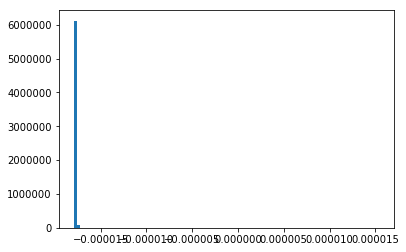

f_2 (375662,)


f_2
count  6.202579e+06
mean   4.622787e-06
std    1.642217e-04
min   -1.789043e-05
25%   -1.528743e-05
50%   -1.038801e-05
75%    2.171242e-06
max    1.944206e-01

f_2
-0.000018  139767
-0.000018   54277
-0.000018   51582
-0.000018   51139
-0.000018   46252

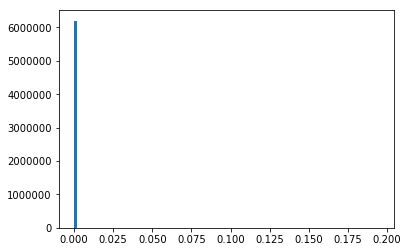

f_3 (135280,)


f_3
count  6.202579e+06
mean  -1.252332e-05
std    1.560677e-04
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.789043e-05
75%   -1.742153e-05
max    1.944206e-01

f_3
-0.000018  4395671
-0.000018    19873
-0.000018    18341
-0.000018    18125
-0.000018    16802

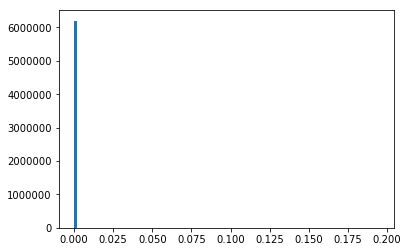

f_4 (344713,)


f_4
count  6.202579e+06
mean  -8.561028e-07
std    5.059819e-05
min   -1.789043e-05
25%   -1.687448e-05
50%   -1.288882e-05
75%   -2.807442e-06
max    2.942223e-02

f_4
-0.000018  668648
-0.000018   73598
-0.000018   67629
-0.000018   65539
-0.000018   56864

f_5 (23849,)


f_5
count  6.202579e+06
mean  -1.777866e-05
std    1.194780e-06
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.789043e-05
75%   -1.789043e-05
max    4.285036e-04

f_5
-0.000018  5909925
-0.000018     9149
-0.000018     7206
-0.000018     6205
-0.000018     5578

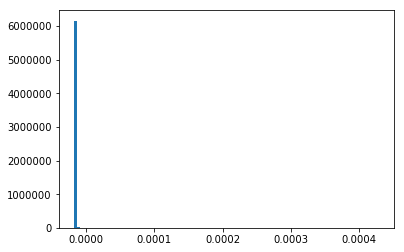

f_6 (444027,)


f_6
count  6.202579e+06
mean   5.922561e-06
std    3.253570e-04
min   -2.261064e-01
25%   -1.617981e-05
50%   -8.937349e-06
75%    7.877095e-06
max    3.664415e-01

f_6
-0.000018  182141
-0.000016   35708
-0.000017   30032
-0.000010   29502
-0.000017   26998

f_7 (158042,)


f_7
count  6.202579e+06
mean  -1.285442e-05
std    3.159795e-04
min   -2.261064e-01
25%   -1.789043e-05
50%   -1.789043e-05
75%   -1.789043e-05
max    3.664415e-01

f_7
-0.000018  4439254
-0.000010    65176
-0.000014    34804
-0.000002    32831
 0.000006    17753

f_8 (397448,)


f_8
count  6.202579e+06
mean   8.653946e-07
std    7.747926e-05
min   -1.564129e-02
25%   -1.733222e-05
50%   -1.172959e-05
75%    1.334519e-06
max    4.604439e-02

f_8
-0.000018  632817
-0.000016   50145
-0.000017   38962
-0.000017   37861
-0.000015   27047

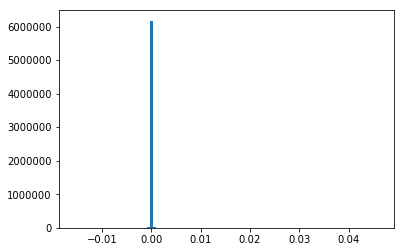

f_9 (6077,)


f_9
count  6.202579e+06
mean  -1.786928e-05
std    1.485516e-06
min   -3.179872e-04
25%   -1.789043e-05
50%   -1.789043e-05
75%   -1.789043e-05
max    1.142640e-03

f_9
-0.000018  6180139
-0.000016      533
-0.000017      515
-0.000017      425
-0.000017      283

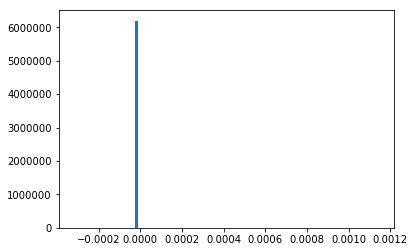

f_10 (862663,)


f_10
count  6.202579e+06
mean  -2.495150e-06
std    2.721099e-04
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.692392e-05
75%   -5.920947e-06
max    4.048002e-01

f_10
-0.000018  2220436
-0.000017    45890
-0.000018    42713
-0.000018    42703
-0.000018    39525

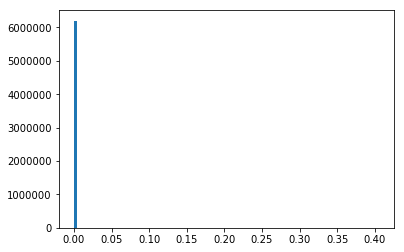

f_11 (146713,)


f_11
count  6.202579e+06
mean  -5.621505e-06
std    3.738066e-05
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.789043e-05
75%   -1.437367e-05
max    4.757713e-03

f_11
-0.000018  4392912
-0.000013     5838
-0.000015     5826
-0.000014     5580
-0.000012     5552

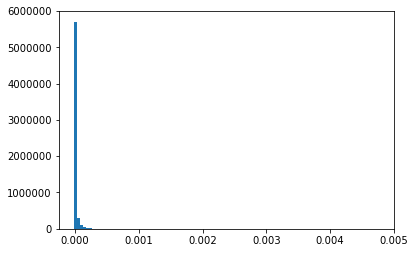

f_12 (339361,)


f_12
count  6.202579e+06
mean   1.605898e-05
std    5.766792e-05
min   -1.789043e-05
25%   -1.320142e-05
50%   -1.976208e-06
75%    2.083094e-05
max    2.325262e-02

f_12
-0.000018  615272
-0.000017   30087
-0.000016   27460
-0.000017   25668
-0.000015   24906

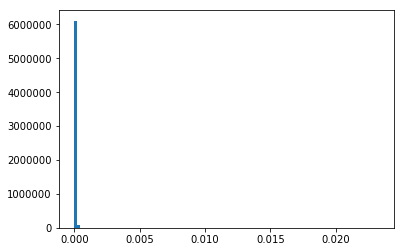

f_13 (49939,)


f_13
count  6.202579e+06
mean  -1.545481e-05
std    2.016927e-05
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.789043e-05
75%   -1.789043e-05
max    3.549510e-03

f_13
-1.789043e-05  5919354
-3.823395e-06     7960
-8.512407e-06     5104
 1.024364e-05     3587
 8.656176e-07     2976

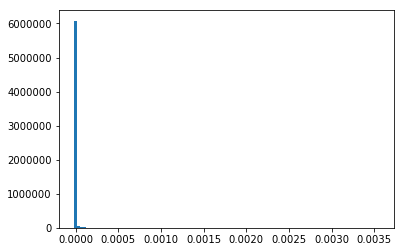

f_14 (25647,)


f_14
count  6.202579e+06
mean  -1.770895e-05
std    2.514553e-07
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.773413e-05
75%   -1.765598e-05
max    9.863153e-05

f_14
-0.000018  1952574
-0.000018   912835
-0.000018   498762
-0.000018   380172
-0.000018   210319

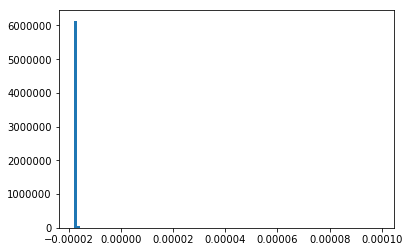

f_15 (1370068,)


f_15
count  6.202579e+06
mean  -8.842869e-06
std    2.882660e-05
min   -1.789043e-05
25%   -1.772007e-05
50%   -1.524201e-05
75%   -1.007541e-05
max    7.844093e-03

f_15
-0.000018  1313349
-0.000016   166237
-0.000017   145652
-0.000017   134511
-0.000016   125841

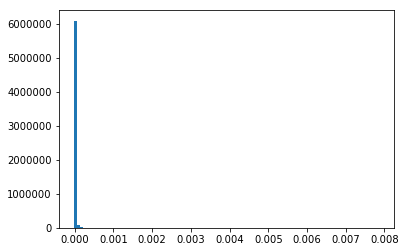

f_20 (98833,)


f_20
count  6.202579e+06
mean  -1.355218e-05
std    1.202535e-06
min   -1.877613e-05
25%   -1.437367e-05
50%   -1.343587e-05
75%   -1.265437e-05
max   -8.746858e-06

f_20
-0.000012  108777
-0.000013  106232
-0.000013  105934
-0.000013  104719
-0.000013  104650

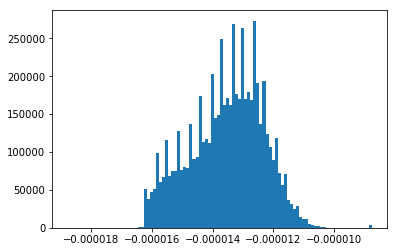

f_27 (1245753,)


f_27
count  6.202579e+06
mean  -4.586323e-06
std    2.428345e-04
min   -1.789043e-05
25%   -1.508496e-05
50%   -1.167149e-05
75%   -4.396098e-06
max    3.082691e-01

f_27
-0.000014  109170
-0.000016  101257
-0.000012   99270
-0.000018   94478
-0.000010   73005

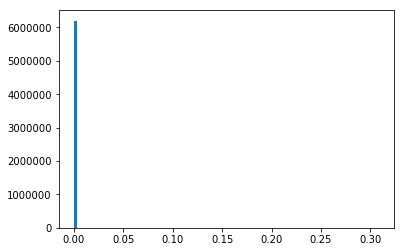

f_29 (880477,)


f_29
count  6.202579e+06
mean  -1.334815e-05
std    7.947180e-05
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.789043e-05
75%   -1.409754e-05
max    1.357964e-01

f_29
-0.000018  3562700
-0.000017     8197
-0.000018     7674
-0.000015     7303
-0.000016     7022

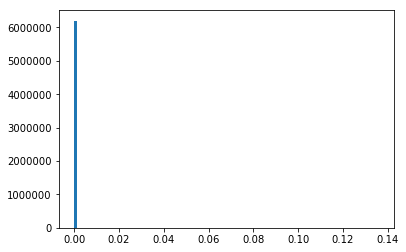

f_30 (1103023,)


f_30
count  6.202579e+06
mean  -1.042735e-05
std    8.242260e-05
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.633993e-05
75%   -1.030986e-05
max    1.318383e-01

f_30
-0.000018  2604758
-0.000015    11920
-0.000017    11404
-0.000018    10019
-0.000016     9582

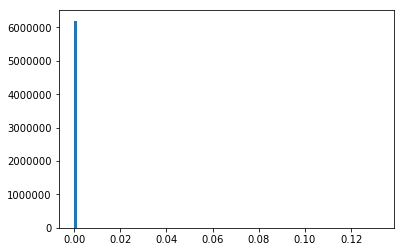

f_31 (1192178,)


f_31
count  6.202579e+06
mean  -8.345370e-06
std    9.169790e-05
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.449090e-05
75%   -7.832670e-06
max    1.318383e-01

f_31
-0.000018  1894010
-0.000015    15113
-0.000017    13812
-0.000018    11715
-0.000017    10846

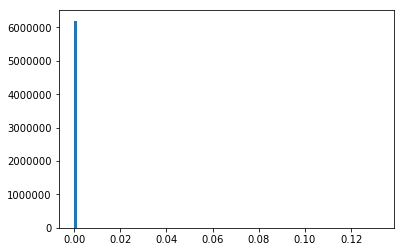

f_32 (1241393,)


f_32
count  6.202579e+06
mean  -5.842387e-06
std    9.613062e-05
min   -1.789043e-05
25%   -1.597929e-05
50%   -1.231754e-05
75%   -5.073798e-06
max    1.318383e-01

f_32
-0.000018  787339
-0.000015   19451
-0.000017   18008
-0.000018   14883
-0.000017   13158

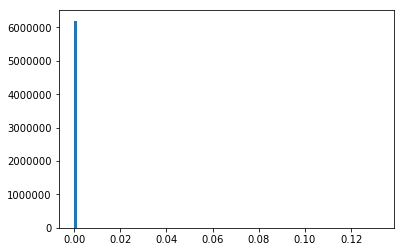

f_34 (1,)


f_34
count  6.202579e+06
mean  -1.789043e-05
std    1.936555e-16
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.789043e-05
75%   -1.789043e-05
max   -1.789043e-05

f_34
-0.000018  6202579

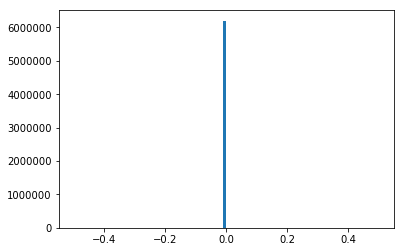

f_35 (444058,)


f_35
count  6.202579e+06
mean  -4.428485e-06
std    1.008139e-04
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.789043e-05
75%   -1.165795e-05
max    9.757839e-02

f_35
-0.000018  3569435
-0.000018    12042
-0.000018    11264
-0.000018    10479
-0.000018    10335

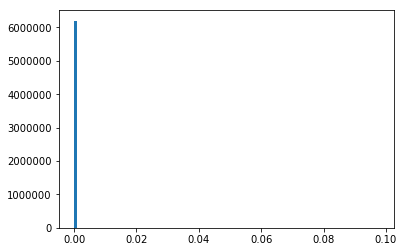

f_36 (588566,)


f_36
count  6.202579e+06
mean   2.191102e-05
std    2.439047e-04
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.570223e-05
75%    3.796250e-06
max    1.346095e-01

f_36
-0.000018  2613543
-0.000018    15760
-0.000018    15420
-0.000018    14369
-0.000018    14055

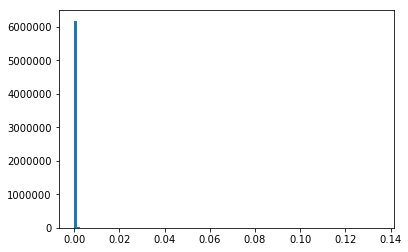

f_37 (691908,)


f_37
count  6.202579e+06
mean   6.032877e-05
std    4.503772e-04
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.033591e-05
75%    2.621234e-05
max    2.571238e-01

f_37
-0.000018  1904038
-0.000018    18642
-0.000018    18469
-0.000018    18176
-0.000018    17037

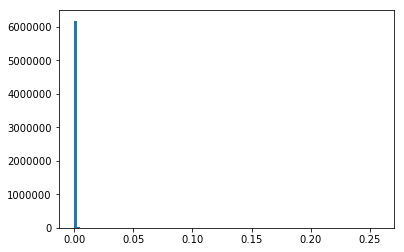

f_38 (809307,)


f_38
count  6.202579e+06
mean   1.389835e-04
std    8.384665e-04
min   -1.789043e-05
25%   -1.437367e-05
50%    3.210124e-06
75%    7.534277e-05
max    5.058143e-01

f_38
-0.000018  799559
-0.000018   24486
-0.000018   24338
-0.000018   22710
-0.000018   22321

f_39 (1,)


f_39
count  6.202579e+06
mean  -1.789043e-05
std    1.936555e-16
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.789043e-05
75%   -1.789043e-05
max   -1.789043e-05

f_39
-0.000018  6202579

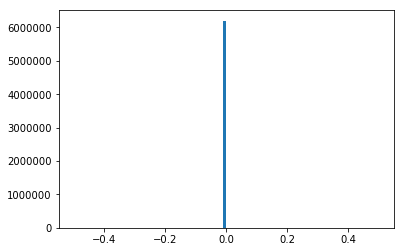

In [76]:
for col in df.columns:
    if col.startswith('f_'):
        if df[col].dtype=='float64':
            vc=df[col].value_counts()
            print col,vc.shape
            display(pd.DataFrame(df[col].describe()))
            display(pd.DataFrame(vc.head()))
            plt.hist(df[col],bins=100);plt.show()

In [51]:
for col in df.columns:
    if col.startswith('f_') and col!='f_41':
        if df[col].dtype=='object':
            vc=df[col].value_counts()
            print col,vc.shape      
            display(pd.DataFrame(vc))

f_16 (5,)


f_16
b  4086609
c  1044573
a   940370
d   131024
e        3

f_17 (5,)


f_17
c  4617723
d  1097266
e   375964
b   103170
a     8456

f_19 (4,)


f_19
c  2852799
a  2413847
b   925441
d    10492

f_21 (4,)


f_21
b  3133024
c  2975556
a    93987
d       12

f_22 (5,)


f_22
a  1619012
e  1564726
d  1369455
b  1085245
c   564141

f_23 (5,)


f_23
a  1619012
e  1564726
d  1369455
b  1085245
c   564141

f_24 (32,)


f_24
m  956552
  715496
~  556999
y  390221
{  362904
u  293268
x  292853
i  290757
k  262622
w  258053
c  250224
j  210010
e  205970
l  197421
}  187592
v  130023
n  128693
g  115292
s   86183
   67670
z   65424
a   41183
|   36969
q   24631
d   19400
f   16626
t   15552
o    8032
h    5947
r    4846
b    3560
p    1606

f_25 (2,)


f_25
b  4573723
a  1628856

f_26 (2,)


f_26
b  5993923
a   208656

f_40 (16,)


f_40
o  3225462
a   786672
g   495175
p   475488
i   364266
f   244414
d   239563
h    88774
n    71441
e    51906
c    43739
j    39232
m    32211
k    16581
l    14462
b    13193

In [54]:
def isnum(s):
    try:
        val = float(s)
        return True
    except ValueError:
        return False

In [61]:
numvals=np.array([ u for u in set(df['f_41'].astype(np.str)) if isnum(u)])

In [65]:
numvals.shape

(1583,)

In [64]:
catvals=np.array([ u for u in set(df['f_41'].astype(np.str)) if not isnum(u)])

In [66]:
catvals.shape

(1238,)

In [69]:
str(list(catvals))

"['T8N', 'T8L', 'T8H', 'B2W', 'T8E', 'B2T', 'T8C', 'T8B', 'T8A', 'T8X', 'T8W', 'T8V', 'T8T', 'T8S', 'T8R', 'J2B', 'Y1A', 'K4R', 'K4M', 'K4K', 'K4A', 'K4B', 'B3H', 'K1R', 'K1P', 'KY1', 'K1V', 'L7R', 'L7S', 'L7P', 'K1T', 'L7T', 'L7J', 'L7K', 'L7N', 'B2H', 'H1X', 'H1Y', 'H1Z', 'H1P', 'H1R', 'H1S', 'H1T', 'H1V', 'H1J', 'H1K', 'H1L', 'H1M', 'H1N', 'H1A', 'H1B', 'H1C', 'H1E', 'H1G', 'K4P', 'E2V', 'G8B', 'E2S', 'E2E', 'E2J', 'E2K', 'V6Z', 'V4L', 'V0T', 'N4Z', 'V0P', 'V0R', 'N4S', 'N4T', 'N4W', 'N4V', 'V0E', 'N4K', 'V0A', 'N4L', 'V0C', 'V0B', 'V0M', 'V0N', 'V0H', 'N4G', 'V0J', 'V4Z', 'V9Y', 'M1B', 'M1E', 'M1G', 'L0S', 'L0R', 'L0P', 'L0M', 'L0G', 'L0E', 'L0C', 'M1K', 'M1J', 'M5T', 'M5W', 'M5V', 'M5P', 'M5S', 'M5R', 'M5G', 'M5A', 'M5C', 'M5B', 'K7A', 'K7C', 'K7G', 'K7H', 'K7K', 'V4X', 'K7M', 'K7L', 'K7N', 'K7R', 'H3K', 'T9M', 'T9N', 'T9H', 'L7L', 'T9J', 'T9K', 'B3T', 'T9E', 'L7M', 'B3P', 'T9A', 'T9C', 'T9V', 'T9W', 'T9S', 'J8P', 'L7A', 'J8T', 'J8V', 'J8Y', 'J8Z', 'L7G', 'Y0A', 'J8E', 'L7E', 'J8L

# train

In [4]:
%time train=pd.read_csv('../input/train.csv')

<string>:2: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 3min 33s, sys: 18.6 s, total: 3min 52s
Wall time: 5min


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21938149 entries, 0 to 21938148
Data columns (total 46 columns):
customer_id    int64
market         object
date           int64
f_0            float64
f_1            float64
f_2            float64
f_3            float64
f_4            float64
f_5            float64
f_6            float64
f_7            float64
f_8            float64
f_9            float64
f_10           float64
f_11           float64
f_12           float64
f_13           float64
f_14           float64
f_15           float64
f_16           object
f_17           object
f_18           int64
f_19           object
f_20           float64
f_21           object
f_22           object
f_23           object
f_24           object
f_25           object
f_26           object
f_27           float64
f_28           int64
f_29           float64
f_30           float64
f_31           float64
f_32           float64
f_33           int64
f_34           float64
f_35           float64
f_36    

In [77]:
df=train

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21938149 entries, 0 to 21938148
Data columns (total 46 columns):
customer_id    int64
market         object
date           int64
f_0            float64
f_1            float64
f_2            float64
f_3            float64
f_4            float64
f_5            float64
f_6            float64
f_7            float64
f_8            float64
f_9            float64
f_10           float64
f_11           float64
f_12           float64
f_13           float64
f_14           float64
f_15           float64
f_16           object
f_17           object
f_18           int64
f_19           object
f_20           float64
f_21           object
f_22           object
f_23           object
f_24           object
f_25           object
f_26           object
f_27           float64
f_28           int64
f_29           float64
f_30           float64
f_31           float64
f_32           float64
f_33           int64
f_34           float64
f_35           float64
f_36    

In [79]:
df.shape

(21938149, 46)

In [80]:
df.head()

customer_id market     date  f_0       f_1       f_2       f_3       f_4  \
0  133900852745      c  5012016  1.0 -0.000018 -0.000015 -0.000017 -0.000015   
1  133900858907      o  5012016  1.0 -0.000018 -0.000018 -0.000018 -0.000018   
2  133900922919      a  5012016  1.0 -0.000018 -0.000016 -0.000018 -0.000016   
3  133901138589      b  5012016  1.0 -0.000018  0.000005 -0.000018  0.000005   
4  133901138589      w  5012016  1.0 -0.000018  0.000008 -0.000018  0.000008   

        f_5       f_6  ...    f_33      f_34      f_35      f_36      f_37  \
0 -0.000018 -0.000015  ...      10 -0.000018 -0.000014 -0.000010  0.000006   
1 -0.000018 -0.000018  ...       0 -0.000018 -0.000018 -0.000018 -0.000013   
2 -0.000018 -0.000007  ...       2 -0.000018 -0.000018 -0.000018 -0.000016   
3 -0.000018  0.000008  ...      10 -0.000018  0.000003  0.000030  0.000068   
4 -0.000018  0.000018  ...       0 -0.000018 -0.000018 -0.000018 -0.000015   

       f_38      f_39  f_40  f_41 target  
0  0.000034 -0.000018     o   234      1  
1 -0.000012 -0.000018     i   891      1  
2 -0.000016 -0.000018     o   774      1  
3  0.000083 -0.000018     o   850      4  
4 -0.000015 -0.000018     o   850      5  

[5 rows x 46 columns]

In [81]:
df.isnull().mean()

customer_id    0.000000
market         0.000000
date           0.000000
f_0            0.000000
f_1            0.000000
f_2            0.000000
f_3            0.000000
f_4            0.000000
f_5            0.000000
f_6            0.000000
f_7            0.000000
f_8            0.000000
f_9            0.000000
f_10           0.000000
f_11           0.000000
f_12           0.000000
f_13           0.000000
f_14           0.000000
f_15           0.000000
f_16           0.000000
f_17           0.000000
f_18           0.000000
f_19           0.000000
f_20           0.000000
f_21           0.000000
f_22           0.000000
f_23           0.000000
f_24           0.000000
f_25           0.000000
f_26           0.000000
f_27           0.000000
f_28           0.000000
f_29           0.000000
f_30           0.000000
f_31           0.000000
f_32           0.000000
f_33           0.000000
f_34           0.000000
f_35           0.000000
f_36           0.000000
f_37           0.000000
f_38           0

In [82]:
df['customer_id'].value_counts().head()

170304396506    134
135255082713    124
174203280833    111
148237566799    108
139111513590    108
Name: customer_id, dtype: int64

In [83]:
df['customer_id'].value_counts().tail()

175506585173    1
254819741732    1
218409020008    1
158602642117    1
206705029034    1
Name: customer_id, dtype: int64

In [26]:
df['customer_id'].min(),df['customer_id'].max()

(133900756857, 258829999646)

In [84]:
df['market'].value_counts()

a    4141131
q    2035628
e    1166032
r    1146630
h     963990
c     945813
f     942082
s     901856
d     896000
k     849637
t     830350
x     774722
j     724953
b     696128
w     685247
g     608601
m     549916
n     524843
l     516044
p     497454
i     490851
v     380295
o     347964
u     321982
Name: market, dtype: int64

In [85]:
df['date'].value_counts()

8012016     2230243
9012016     2225071
5012016     2220431
11012016    2210823
12012016    2201205
1012017     2187589
2012017     2168841
3012017     2146708
4012017     2122833
10012016    1480306
7012016      744099
Name: date, dtype: int64

In [86]:
for col in df.columns:
    if col.startswith('f_'):
        if df[col].dtype=='int64':
            print col, df[col].value_counts().shape
            display(pd.DataFrame(df[col].value_counts()))
            

f_18 (3,)


f_18
0  17576519
1   3270339
2   1091291

f_28 (21,)


f_28
20  4161121
19  3417804
18  2965316
16  2896691
17  2225642
14  1832895
15  1736237
12   913353
13   893781
11   376171
9    187089
10   185655
8     94746
7     38212
6      6852
5      2457
4      1684
3      1027
2       754
1       436
0       226

f_33 (14,)


f_33
5   5168169
2   4449854
7   2491563
0   2012283
4   1937987
11  1900433
6   1298136
10  1104210
1    556548
8    311511
9    252607
13   222272
12   175674
3     56902

In [87]:
df['f_0'].value_counts().head()

1.000000    20377438
0.000000      356151
0.500000      184120
0.666667      110903
0.750000       75806
Name: f_0, dtype: int64

f_0 (3489,)


f_0
count  2.193815e+07
mean   9.717071e-01
std    1.414877e-01
min    0.000000e+00
25%    1.000000e+00
50%    1.000000e+00
75%    1.000000e+00
max    1.000000e+00

f_0
1.000000  20377438
0.000000    356151
0.500000    184120
0.666667    110903
0.750000     75806

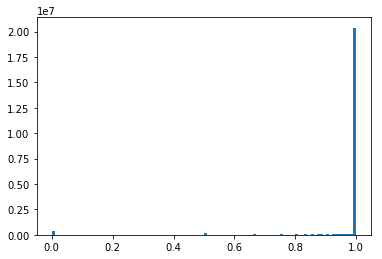

f_1 (19129,)


f_1
count  2.193815e+07
mean  -1.777515e-05
std    7.099191e-08
min   -1.789043e-05
25%   -1.781228e-05
50%   -1.781228e-05
75%   -1.773413e-05
max    4.150373e-05

f_1
-0.000018  10656570
-0.000018   2711597
-0.000018   1121204
-0.000018    815952
-0.000018    423603

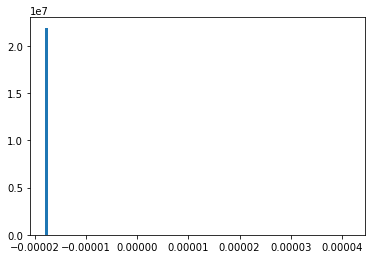

f_2 (779731,)


f_2
count  2.193815e+07
mean   2.734814e-06
std    1.419151e-04
min   -1.789043e-05
25%   -1.544173e-05
50%   -1.090901e-05
75%    4.748666e-07
max    3.682659e-01

f_2
-0.000018  467128
-0.000018  200175
-0.000018  190970
-0.000018  189147
-0.000018  171849

f_3 (294512,)


f_3
count  2.193815e+07
mean  -1.306412e-05
std    1.326507e-04
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.789043e-05
75%   -1.749968e-05
max    3.682659e-01

f_3
-0.000018  15678196
-0.000018     72550
-0.000018     65933
-0.000018     64937
-0.000018     61669

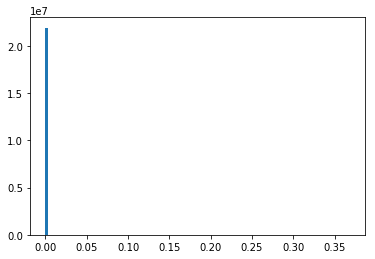

f_4 (713705,)


f_4
count  2.193815e+07
mean  -2.208779e-06
std    4.983945e-05
min   -1.789043e-05
25%   -1.695263e-05
50%   -1.322747e-05
75%   -3.979695e-06
max    2.942223e-02

f_4
-0.000018  2361457
-0.000018   267927
-0.000018   245728
-0.000018   238221
-0.000018   207824

f_5 (60214,)


f_5
count  2.193815e+07
mean  -1.777315e-05
std    1.213068e-06
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.789043e-05
75%   -1.789043e-05
max    5.212679e-04

f_5
-0.000018  20868218
-0.000018     28901
-0.000018     23503
-0.000018     22096
-0.000017     19374

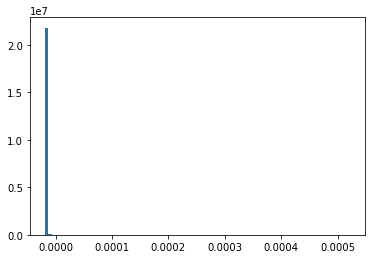

f_6 (919099,)


f_6
count  2.193815e+07
mean   3.913673e-06
std    4.100353e-04
min   -1.641322e-01
25%   -1.624928e-05
50%   -9.606510e-06
75%    5.710931e-06
max    1.000000e+00

f_6
-0.000018  628567
-0.000016  131164
-0.000017  110705
-0.000010  106133
-0.000017   99457

f_7 (350008,)


f_7
count  2.193815e+07
mean  -1.333440e-05
std    4.031404e-04
min   -1.642896e-01
25%   -1.789043e-05
50%   -1.789043e-05
75%   -1.789043e-05
max    1.000000e+00

f_7
-0.000018  15826517
-0.000010    226941
-0.000014    122852
-0.000002    113053
 0.000006     60481

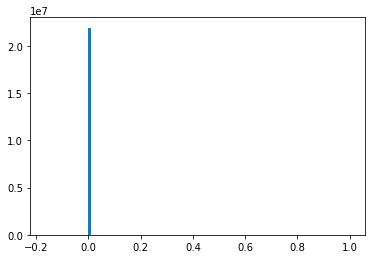

f_8 (817405,)


f_8
count  2.193815e+07
mean  -6.693174e-07
std    7.497949e-05
min   -2.184517e-02
25%   -1.734338e-05
50%   -1.215942e-05
75%   -2.284853e-07
max    4.604439e-02

f_8
-0.000018  2240803
-0.000016   179964
-0.000017   141261
-0.000017   136143
-0.000015    95318

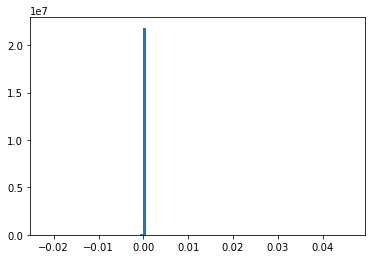

f_9 (22383,)


f_9
count  2.193815e+07
mean  -1.786347e-05
std    1.811870e-06
min   -9.197438e-04
25%   -1.789043e-05
50%   -1.789043e-05
75%   -1.789043e-05
max    1.294304e-03

f_9
-0.000018  21817278
-0.000016      2449
-0.000017      2339
-0.000017      1566
-0.000010      1210

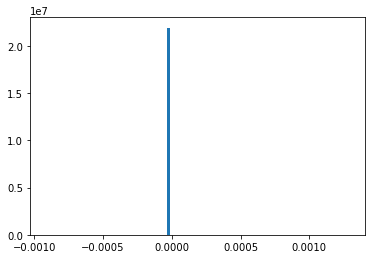

f_10 (1969243,)


f_10
count  2.193815e+07
mean  -4.519495e-06
std    2.706234e-04
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.710893e-05
75%   -7.719964e-06
max    4.048002e-01

f_10
-0.000018  8112321
 0.000007   165328
-0.000017   163892
-0.000018   163085
-0.000018   155664

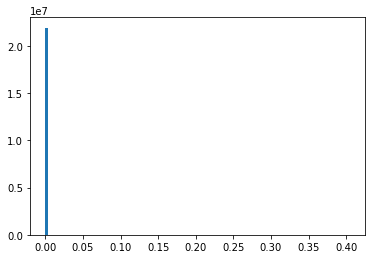

f_11 (314226,)


f_11
count  2.193815e+07
mean  -6.449639e-06
std    3.547840e-05
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.789043e-05
75%   -1.509266e-05
max    4.565776e-03

f_11
-0.000018  15669452
-0.000015     20281
-0.000013     20157
-0.000016     19599
-0.000014     19505

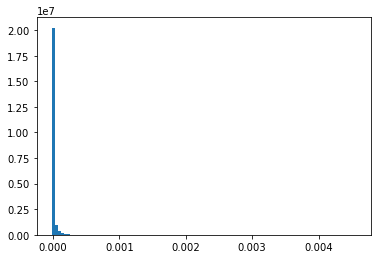

f_12 (692129,)


f_12
count  2.193815e+07
mean   1.409909e-05
std    5.620472e-05
min   -1.789043e-05
25%   -1.351402e-05
50%   -2.916852e-06
75%    1.837126e-05
max    4.250489e-02

f_12
-0.000018  2177221
-0.000017   106243
-0.000016    98645
-0.000017    92545
-0.000015    89872

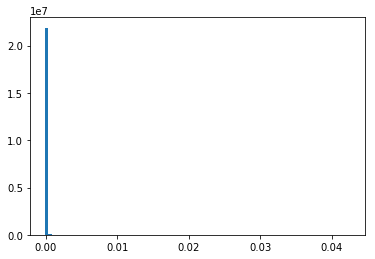

f_13 (125702,)


f_13
count  2.193815e+07
mean  -1.550788e-05
std    1.953392e-05
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.789043e-05
75%   -1.789043e-05
max    5.748686e-03

f_13
-1.789043e-05  20904330
-3.823395e-06     22222
-8.512407e-06     19233
 8.656176e-07     10435
-1.320142e-05     10138

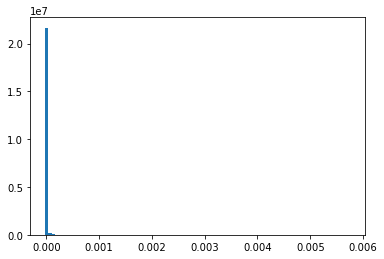

f_14 (36872,)


f_14
count  2.193815e+07
mean  -1.772848e-05
std    2.226966e-07
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.776018e-05
75%   -1.765598e-05
max    1.947563e-04

f_14
-0.000018  7023187
-0.000018  3452057
-0.000018  1697874
-0.000018  1276193
-0.000018   771578

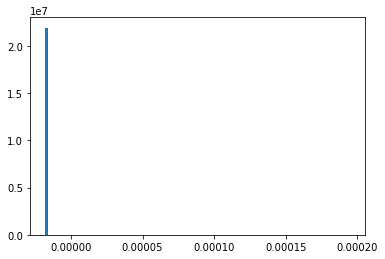

f_15 (3939464,)


f_15
count  2.193815e+07
mean  -9.639578e-06
std    2.700103e-05
min   -1.789043e-05
25%   -1.778044e-05
50%   -1.542364e-05
75%   -1.044797e-05
max    1.225326e-02

f_15
-0.000018  4768117
-0.000016   570580
-0.000017   496861
-0.000016   448642
-0.000017   423535

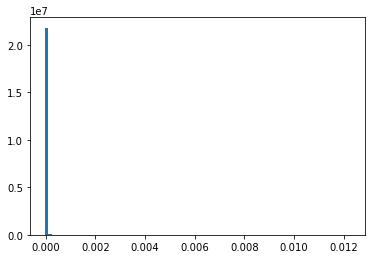

f_20 (163558,)


f_20
count  2.193815e+07
mean  -1.356716e-05
std    1.208319e-06
min   -2.429875e-05
25%   -1.439371e-05
50%   -1.343587e-05
75%   -1.265437e-05
max   -8.825008e-06

f_20
-0.000013  389545
-0.000013  375902
-0.000013  372189
-0.000013  371139
-0.000013  370487

f_27 (3143020,)


f_27
count  2.193815e+07
mean  -5.171722e-06
std    1.497399e-04
min   -1.789043e-05
25%   -1.513564e-05
50%   -1.173133e-05
75%   -4.761197e-06
max    3.082691e-01

f_27
-0.000018  309660
-0.000014  204812
-0.000016  195372
-0.000012  178539
-0.000010  135499

f_29 (2480692,)


f_29
count  2.193815e+07
mean  -1.337915e-05
std    4.109332e-05
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.789043e-05
75%   -1.392040e-05
max    4.677533e-02

f_29
-0.000018  12249587
-0.000017     31126
-0.000018     28721
-0.000015     27825
-0.000016     26984

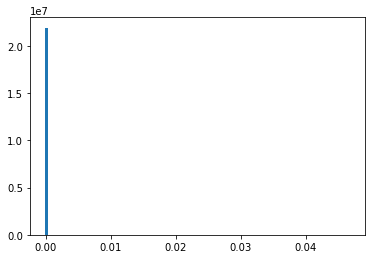

f_30 (2950491,)


f_30
count  2.193815e+07
mean  -1.056403e-05
std    4.837918e-05
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.613466e-05
75%   -1.034477e-05
max    4.677533e-02

f_30
-0.000018  8875369
-0.000015    45537
-0.000017    42874
-0.000018    37236
-0.000016    35679

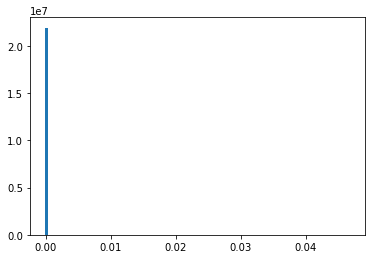

f_31 (3084083,)


f_31
count  2.193815e+07
mean  -8.629962e-06
std    5.849014e-05
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.442056e-05
75%   -8.092176e-06
max    4.677533e-02

f_31
-0.000018  6434699
-0.000015    56168
-0.000017    51858
-0.000018    42170
-0.000017    39330

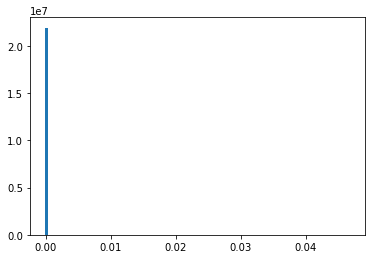

f_32 (3135533,)


f_32
count  2.193815e+07
mean  -6.332904e-06
std    1.141456e-04
min   -1.789043e-05
25%   -1.598357e-05
50%   -1.247567e-05
75%   -5.640387e-06
max    2.165488e-01

f_32
-0.000018  2719708
-0.000017    66814
-0.000015    66666
-0.000018    51927
-0.000017    47779

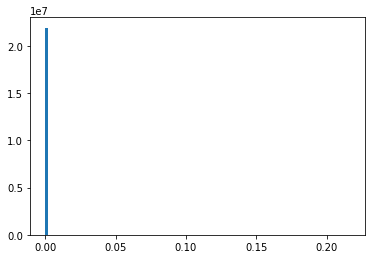

f_34 (153089,)


f_34
count  2.193815e+07
mean  -1.783389e-05
std    2.689928e-06
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.789043e-05
75%   -1.789043e-05
max    9.462251e-03

f_34
-0.000018  21576433
-0.000018       944
-0.000017       928
-0.000017       911
-0.000017       835

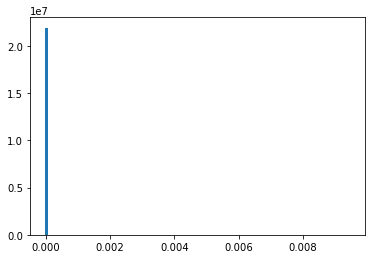

f_35 (1076674,)


f_35
count  2.193815e+07
mean  -4.740072e-06
std    8.175972e-05
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.789043e-05
75%   -1.130907e-05
max    6.165388e-02

f_35
-0.000018  12272663
-0.000018     44444
-0.000018     42718
-0.000018     39831
-0.000018     38262

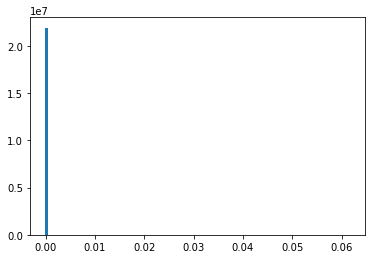

f_36 (1483601,)


f_36
count  2.193815e+07
mean   2.072298e-05
std    2.171393e-04
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.531148e-05
75%    3.852072e-06
max    1.365933e-01

f_36
-0.000018  8905420
-0.000018    56467
-0.000018    55994
-0.000018    55340
-0.000018    51597

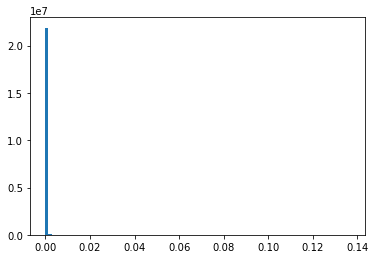

f_37 (1775196,)


f_37
count  2.193815e+07
mean   5.751432e-05
std    4.067469e-04
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.003634e-05
75%    2.540478e-05
max    2.563531e-01

f_37
-0.000018  6469038
-0.000018    66915
-0.000018    66658
-0.000018    64372
-0.000018    61779

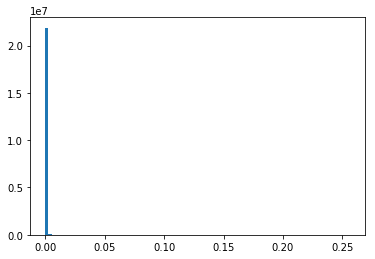

f_38 (2104048,)


f_38
count  2.193815e+07
mean   1.323046e-04
std    7.756339e-04
min   -1.789043e-05
25%   -1.429552e-05
50%    2.936598e-06
75%    7.202138e-05
max    4.787688e-01

f_38
-0.000018  2761385
-0.000018    87861
-0.000018    84590
-0.000018    79602
-0.000018    77220

f_39 (101854,)


f_39
count  2.193815e+07
mean  -1.773552e-05
std    6.914095e-06
min   -1.789043e-05
25%   -1.789043e-05
50%   -1.789043e-05
75%   -1.789043e-05
max    2.183557e-02

f_39
-0.000018  21577252
-0.000018      1325
-0.000018      1254
-0.000018      1189
-0.000018      1165

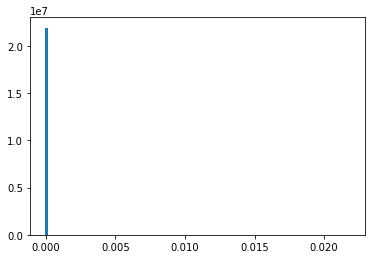

In [88]:
for col in df.columns:
    if col.startswith('f_'):
        if df[col].dtype=='float64':
            vc=df[col].value_counts()
            print col,vc.shape
            display(pd.DataFrame(df[col].describe()))
            display(pd.DataFrame(vc.head()))
            plt.hist(df[col],bins=100);plt.show()

In [89]:
for col in df.columns:
    if col.startswith('f_') and col!='f_41':
        if df[col].dtype=='object':
            vc=df[col].value_counts()
            print col,vc.shape      
            display(pd.DataFrame(vc))

f_16 (5,)


f_16
b  15028335
c   3606237
a   2942763
d    360796
e        18

f_17 (5,)


f_17
c  16568549
d   3690770
e   1296153
b    357216
a     25461

f_19 (4,)


f_19
c  9731684
a  9224519
b  2937565
d    44381

f_21 (5,)


f_21
b  11120445
c  10472139
a    345509
d        54
e         2

f_22 (5,)


f_22
e  5653589
a  5472911
d  4921104
b  3852386
c  2038159

f_23 (5,)


f_23
e  5653589
a  5472911
d  4921104
b  3852386
c  2038159

f_24 (32,)


f_24
m  3397040
  2576672
~  2046801
y  1389193
{  1291163
x  1085662
u  1076509
i  1015791
w   935124
c   841036
k   824682
j   824335
l   667592
}   653455
e   609572
n   455346
v   444374
g   416849
s   328979
   243245
z   219962
|   133416
a   124071
q    91905
d    65241
f    52384
t    48874
o    26379
h    19243
r    15368
b    12115
p     5771

f_25 (2,)


f_25
b  14805604
a   7132545

f_26 (2,)


f_26
b  21185935
a    752214

f_40 (16,)


f_40
o  11435308
a   2849641
p   1707860
g   1674003
i   1288171
f    899218
d    805265
h    315788
n    247893
e    175271
c    146253
j    135779
m    106631
k     58385
l     49313
b     43370

In [90]:
def isnum(s):
    try:
        val = float(s)
        return True
    except ValueError:
        return False

In [91]:
numvals=np.array([ u for u in set(df['f_41'].astype(np.str)) if isnum(u)])

In [92]:
numvals.shape

(1751,)

In [93]:
catvals=np.array([ u for u in set(df['f_41'].astype(np.str)) if not isnum(u)])

In [94]:
catvals.shape

(1296,)

In [95]:
str(list(catvals))

"['T8N', 'T8H', 'B2W', 'T8E', 'B2T', 'T8B', 'T8A', 'T8L', 'T8X', 'T8W', 'T8V', 'T8T', 'T8S', 'T8R', 'B2X', 'Y1A', 'R1A', 'K4M', 'K4K', 'K4A', 'K4B', 'K4C', 'B3H', 'T8C', 'K1P', 'KY1', 'K1V', 'L7R', 'L7S', 'L7P', 'K1T', 'L7T', 'L7J', 'L7K', 'L7N', 'B2H', 'H1X', 'H1Y', 'H1Z', 'H1P', 'H1R', 'H1S', 'H1T', 'H1V', 'H1H', 'H1J', 'H1K', 'H1L', 'H1M', 'H1N', 'H1A', 'H1B', 'H1C', 'H1E', 'K4P', 'E2V', 'G8B', 'E2E', 'S4W', 'E2M', 'E2N', 'E2J', 'E2K', 'K2H', 'V4L', 'M1B', 'N4X', 'N4Z', 'G4V', 'V0R', 'N4S', 'N4T', 'N4W', 'N4V', 'V0E', 'N4K', 'V0A', 'N4L', 'V0C', 'V0B', 'V0M', 'V0L', 'N4C', 'N4B', 'V0H', 'V0K', 'V0J', 'V4Z', 'V9T', 'B3K', 'M1E', 'L0S', 'L0R', 'L0P', 'L0M', 'L0J', 'L0H', 'L0G', 'L0E', 'L0C', 'M1K', 'M1J', 'G3H', 'M5T', 'M5W', 'M5V', 'M5P', 'M5S', 'M5R', 'M5X', 'M5G', 'M5A', 'M5C', 'M5B', 'K7A', 'K7C', 'K7G', 'K7H', 'K7K', 'V4X', 'K7M', 'K7L', 'K7N', 'K7R', 'M2J', 'T9M', 'T9N', 'T9H', 'L7L', 'T9J', 'T9K', 'B3T', 'T9E', 'T9G', 'B3P', 'T9A', 'T9C', 'B3M', 'T9X', 'B3E', 'T9V', 'T9W', 'T9S

In [96]:
train['target'].value_counts()

1     5516217
2     3638695
3     2531371
5     2380847
4     1825036
7     1608150
6     1441715
8      842854
9      812691
0      466073
10     359110
12     189472
11     183079
13      94142
14      42898
15       2481
16       1786
17        858
18        553
20        121
Name: target, dtype: int64

In [5]:
import fastparquet
reload(fastparquet)

<module 'fastparquet' from '/home/spark/anaconda2/lib/python2.7/site-packages/fastparquet/__init__.pyc'>

In [6]:
df=test

In [7]:
for col in df.columns:
    if col.startswith('f_')  :
        if df[col].dtype=='float64':
            df[col]=df[col].astype(np.float32)

In [8]:
df['f_41']=df['f_41'].astype(np.str)

In [9]:
fastparquet.write('../input/test.parq', df, 
          compression='SNAPPY')

In [10]:
df=train

In [11]:
for col in df.columns:
    if col.startswith('f_')  :
        if df[col].dtype=='float64':
            df[col]=df[col].astype(np.float32)

In [12]:
df['f_41']=df['f_41'].astype(np.str)

In [13]:
fastparquet.write('../input/train.parq', df, 
          compression='SNAPPY')